In [4]:
import statsmodels.api as sm

In [8]:
import numpy as np

In [9]:
T = 100
n = 5

In [10]:
a_bar = 5; a_sd = 1
b_bar = 15; b_sd = 1
colvec = ['TSUS', 'd1', 'd2']


mean = [0, 0]

cov = [[1, 0], [0, 100]]  # diagonal covariance

In [13]:
df = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=T),
                       b=np.random.normal(b_bar, b_sd, size=T),
                       c=np.random.normal(b_bar, b_sd, size=T)),
                  columns=colvec)

In [14]:
df

,TSUS,d1,d2


In [ ]:
def LSTM_processor(list_of_series, shocktime_vec, shocklength_vec):

In [ ]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

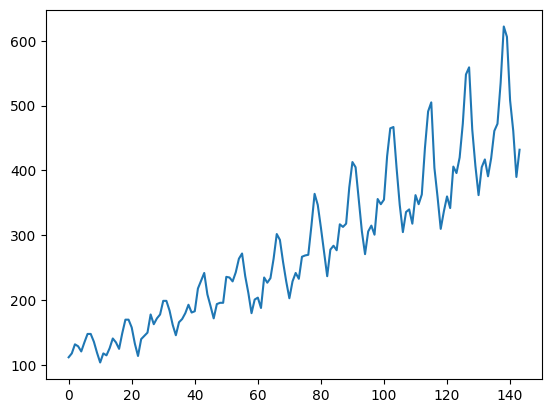

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [10]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [11]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [12]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 0s - 3ms/step - loss: 0.0334
Epoch 2/100
94/94 - 0s - 258us/step - loss: 0.0157
Epoch 3/100
94/94 - 0s - 252us/step - loss: 0.0121
Epoch 4/100
94/94 - 0s - 258us/step - loss: 0.0109
Epoch 5/100
94/94 - 0s - 256us/step - loss: 0.0101
Epoch 6/100
94/94 - 0s - 266us/step - loss: 0.0092
Epoch 7/100
94/94 - 0s - 268us/step - loss: 0.0084
Epoch 8/100
94/94 - 0s - 263us/step - loss: 0.0076
Epoch 9/100
94/94 - 0s - 254us/step - loss: 0.0068
Epoch 10/100
94/94 - 0s - 258us/step - loss: 0.0061
Epoch 11/100
94/94 - 0s - 263us/step - loss: 0.0054
Epoch 12/100
94/94 - 0s - 259us/step - loss: 0.0048
Epoch 13/100
94/94 - 0s - 254us/step - loss: 0.0042
Epoch 14/100
94/94 - 0s - 258us/step - loss: 0.0037
Epoch 15/100
94/94 - 0s - 257us/step - loss: 0.0033
Epoch 16/100
94/94 - 0s - 255us/step - loss: 0.0030
Epoch 17/100
94/94 - 0s - 258us/step - loss: 0.0027
Epoch 18/100
94/94 - 0s - 259us/step - loss: 0.0025
Epoch 19/100
94/94 - 0s - 257us/step - loss: 0.0023
Epoch 20/100
94/94 - 0s - 269us/ste

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train Score: 22.73 RMSE
Test Score: 50.74 RMSE


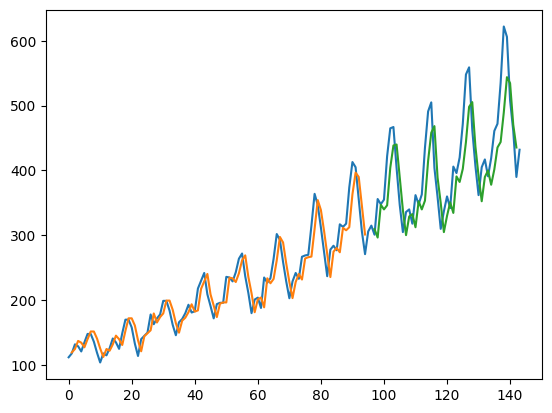

In [22]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()